In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Task 2
google_drive_link = 'https://drive.google.com/uc?id=1NABxiK1OeSOhUssBxiZpHPwKtjletSFP'
df = pd.read_csv(google_drive_link, sep=',',header=None)  # Adjust the separator based on your file format
df.columns = ['x1','x2','x3','x4','y']

#    1. variance of Wavelet Transformed image (continuous)
#    2. skewness of Wavelet Transformed image (continuous)
#    3. curtosis of Wavelet Transformed image (continuous)
#    4. entropy of image (continuous)
#    5. class (integer)

#Task 1
# Network Architecture: Build a network as [4,10,1]. Input layer: 4 neurons, one hidden layer of 10 neurons and one output layer with 1 neuron.
input_layer_size = 4
hidden_layer_size = 10
output_layer_size = 1

#Task 3
# Split the data randomly into [T, V, S]. T = 70% for training, V = 20% for validation, and S = 10% for testing.
t = 0.7
v = 0.2
s = 0.1

#Task 4
# Divide the data into batches each of which is 100 sample points.
batch_size = 100

#Task 5
# Train the network at least 10 epochs.
epochs = 10

#Task 6
#Learning Rate for back propagation
alpha = 0.01


#HyperParameters
# Dataset
# Batch Size
# learning rate
# Layer sizes
# the three splitting sizes
# epochs


df

,x1,x2,x3,x4,y
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
#Task 1
#Network Architecture: Build a network as [4,10,1]. Input layer: 4 neurons, one hidden layer of 10 neurons and one output layer with 1 neuron.
#Creating the weights and biases between and for the neuron. Used in Main Function
def initialize_weights(input_layer_size, hidden_layer_size, output_layer_size):
  initial_weights1 = np.random.randn(input_layer_size,hidden_layer_size) #between input and hidden
  if output_layer_size !=1:
    initial_weights2 = np.random.randn(hidden_layer_size,output_layer_size) #between hidden and output
  else:
    initial_weights2 = np.random.randn(hidden_layer_size) #between hidden and output

  bias1 = np.random.randn(hidden_layer_size)
  bias2 = np.random.randn(output_layer_size)

  return np.array([initial_weights1, initial_weights2, bias1 , bias2],dtype=object)

In [ ]:
#Task 3
#Split the data randomly into [T, V, S]. T = 70% for training, V = 20% for validation, and S = 10% for testing.
# Function for splitting dataset into three different sets for training, validation and testing. Used in Main Function

# Define the weights for each split (70%, 20%, 10%)
#To avoid hard coding (Some words here that should not be said)
def splitting(df,t,v,s):
  # Calculate the number of rows for each split
  total_rows = len(df)
  df_copy = df.copy()
  split_sizes = [int(frac * total_rows) for frac in [t, v, s]]
  split_sizes[-1] = total_rows - sum(split_sizes[:-1])
  # Use sample to split the DataFrame
  df_split_1 = df.sample(n=split_sizes[0], replace=False).reset_index(drop=True)
  df_copy.drop(df_split_1.index)
  df_split_2 = df_copy.sample(n=split_sizes[1], replace=False).reset_index(drop=True)
  df_copy.drop(df_split_2.index)
  df_split_3 = df_copy.sample(n=split_sizes[2], replace=False).reset_index(drop=True)

  return df_split_1, df_split_2, df_split_3

In [ ]:
#Task 4
#Divide the data into batches each of which is 100 sample points.
#Function done for splitting into batches and found in Task 6 function train_Farafra

def split_batches(training_set,batch_size):
  # Create a list of batches
  batches = []
  # Create a batch
  batch = []
  # Loop through the DataFrame
  for index, row in training_set.iterrows():
      # Append the row to the batch
      batch.append(row)
      # Check if the batch is full
      if len(batch) == batch_size:
          # Add the batch to the list of batches
          batches.append(batch)
          # Clear the batch
          batch = []
  # Add the last batch
  batches.append(batch)

  return batches


In [ ]:
#Task 5
#Train the network at least 10 epochs
# Epochs variable set at first cell and used in main function Farafra


In [ ]:
#Task 6
#Implement the backpropagation algorithm to train the network. The function apply one training epoch only.
##The inputs are: Labeled training partition of the data: T, the matrix of the network weights, and the batch size. It returns the matrix of the network weights.
##Define the training function as “Weights_Matrix = train_[Teamname](Labeled_Input_Matrix, Weights_Matrix, BatchSize)”
#Defining Sigmoid Activation Function, Forward Pass, Back Propagation and the train_Farafra function to train on training dataset for one epoch
#-----------------------------------------------------------------------------------------------------
#Activation Function
def sigmoid(z):
  out = 1/(1+np.exp(-z))
  return out
#-----------------------------------------------------------------------------------------------------
# Perform the forward pass of the inputs through the network layers
def forward_pass(batch, weights_matrix):
    # Extract the last column which contains the true values
    truth_column = [row[-1] for row in batch]
    #Get the rest of the batch without the truth column
    batch = [row[:-1] for row in batch]
    #Calculating input to the hidden layer from the input layer
    first_layer_z_values = np.add(np.dot(batch,weights_matrix[0]),weights_matrix[2])
    #Calculating output of neurons of hidden layer using Sigmoid Activation Function
    first_layer_y_values =  sigmoid(first_layer_z_values)

    #Calculating input to the output layer from the hidden layer
    second_layer_z_values = np.add(np.dot(first_layer_y_values,weights_matrix[1]),weights_matrix[3])
    #Calculating output of neurons of output layer using Sigmoid Activation Function
    second_layer_y_values = sigmoid(second_layer_z_values)
    #Calculating error mean squared from output of output layer and the true value
    error_mean_squared = (0.5 * np.sum(np.subtract(truth_column, second_layer_y_values)**2))/len(batch)

    return first_layer_y_values, second_layer_y_values , error_mean_squared
#-----------------------------------------------------------------------------------------------------
#Backward pass
def back_propagation(batch, alpha,first_layer_y_values, second_layer_y_values, weights_matrix):
  # Extract the last column which contains the true values
  truth_column = [row[-1] for row in batch]
  #Get the rest of the batch without the truth column
  batch = [row[:-1] for row in batch]

  error_vector = np.subtract(truth_column,second_layer_y_values) * -1
  #Averaging the total values
  avg_first_layer_y_values = np.average(first_layer_y_values , axis=0)
  #Calculate the average of the output y of the second layer
  avg_second_layer_y_values = np.average(second_layer_y_values)
  #Calculate the average of the values in the truth column
  avg_truth_column = np.average(truth_column)
  #Calculate the average of the input values of the batch
  avg_batch = np.average(batch, axis = 0)

  #Initializing matrices for the new weights and bias
  new_weights_layer1 = np.zeros_like(weights_matrix[0])
  new_weights_layer2 = np.zeros_like(weights_matrix[1])
  new_bias1 = np.zeros_like(weights_matrix[2])
  new_bias2 = np.zeros_like(weights_matrix[3])

  # Calculate the derivative of the error with respect to the second layer output y
  de_dy = np.average(error_vector)
  # Calculate the derivative of the output y with respect to z in the second layer
  dy_dz = avg_second_layer_y_values * (1-avg_second_layer_y_values)

  #Loops to change weights between hidden and output layer
  for j in range(len(weights_matrix[1])):
    # Calculate the derivative of z with respect to the weight(which is the corresponding y value in the first layer)
    zf_wi = avg_first_layer_y_values[j]
    # Calculate the change that will happen to the weight
    new_weight_error = de_dy * dy_dz * zf_wi
    # Subtract the weight change from the original weights and saving the result in the new weights layer
    new_weights_layer2[j] = weights_matrix[1][j] - alpha*new_weight_error

  #Loops to change weights between input and hidden layer
  for k in range(len(weights_matrix[0])): #4 rows
    for l in range(len(weights_matrix[0][0])): #10 columns
      # Calculate the derivative of z with respect to the output y (which is the corresponding weight value in the first layer)
      zf_yi = weights_matrix[1][l]
      # Calculate the derivative of y with respect to z in the first layer
      yi_zi = avg_first_layer_y_values[l] * (1-avg_first_layer_y_values[l])
      # Calculate the derivative of z with respect to the weight(which is the corresponding input value)
      zi_wi = avg_batch[k]
      # Calculate the change that will happen to the weight
      new_weight_error = de_dy * dy_dz * zf_yi * yi_zi * zi_wi
      # Subtract the weight change from the original weights and saving the result in the new weights layer
      new_weights_layer1[k][l] = weights_matrix[0][k][l] - alpha*new_weight_error

  # Loops to change the bias of the neruons in the hidden layer
  for m in range(len(weights_matrix[2])):
    # Calculate the derivative of z with respect to the weight(which is the corresponding y value in the first layer)
    zf_yi = weights_matrix[1][m]
    # Calculate the derivative of y with respect to z in the first layer
    yi_zi = avg_first_layer_y_values[m] * (1-avg_first_layer_y_values[m])
    # Update the bias using old bias minus the change in the bias
    new_bias1[m] = weights_matrix[2][m] - alpha * (de_dy * dy_dz * zf_yi * yi_zi)

  # Loops to change the bias of the neurons (in this example 1 neuron) in the output layer
  for n in range(len(weights_matrix[3])):
    # Update the bias using old bias minus the change in the bias
    new_bias2[n] = weights_matrix[3][n] - alpha * (de_dy * dy_dz)

  return np.array([new_weights_layer1 , new_weights_layer2, new_bias1, new_bias2],dtype=object)
#-----------------------------------------------------------------------------------------------------
#Train for 1 epoch
#Weights_Matrix = train_[Teamname](Labeled_Input_Matrix, Weights_Matrix, BatchSize)”
def train_Farafra(Labeled_Input_Matrix, weights_matrix, BatchSize,alpha):
    #Task 4
    #Divide the data into batches each of which is 100 sample points.
    #Splitting training set into batches of size BatchSize (100)
    batches = split_batches(Labeled_Input_Matrix,BatchSize)
    #Looping on all the batches
    for batch in batches:
      # Perform the forward pass on a batch
      first_layer_y_values, second_layer_y_values , error_mean_squared = forward_pass(batch, weights_matrix)

      #Task 9
      #The backpropagation pass should be executed after each iteration (one batch).
      # Perform the backward pass on a batch
      weights_matrix = back_propagation(batch, alpha, first_layer_y_values, second_layer_y_values, weights_matrix)
    return weights_matrix



In [ ]:
#Task 8 is made before Task 7 as task 7 uses the function of Task 8

In [ ]:
#Task 8
#For the training and testing you will need to use a function that calculates the aggregated error.
##Define the error function as: “Error_Vector, Error = error_[Teamname](Actual_Outputs_Vector, Target_Output Vector)”
# Error funtion that calculates error mean squared, error vector and accuracy using the true and predicted outputs

def error_Farafra(actual_outputs_vector, target_output_vector):
  #Rounding output to the labels they are closer to
  x = np.array([1 if i>=0.5 else 0 for i in actual_outputs_vector])

  #Sum/Average error mean squared on the batch OR  Sum/Average of (target-actual) in batch
  error = (0.5 * np.sum(np.subtract(target_output_vector, actual_outputs_vector)**2)) #/len(actual_outputs_vector)
  #If predicted output value same as true output value, the index in the vector is set to true
  error_vector = (x == np.array(target_output_vector))

  #Counting how many predicted output values are correct to calculate accuracy
  counter = 0
  for i in range(len(actual_outputs_vector)):
    if x[i] == target_output_vector[i]:
      counter += 1
  accuracy = (counter/len(target_output_vector))*100

  return error_vector , error, accuracy


In [ ]:
#Task 7
def test_Farafra(test_set, weights_matrix):
    test_array = np.array(test_set)
    #Getting the output column from the testing set
    target_output_vector = [row[-1] for row in test_array]

    #Doing a forward pass on the testing set to return the predicted output vector
    unneeded, actual_outputs_vector, error_mean_squared = forward_pass(test_array, weights_matrix)

    #Calculating the error between the predicted output vector and the target output vector
    error_vector , error, accuracy = error_Farafra(actual_outputs_vector, target_output_vector)

    return error_vector , error, accuracy

In [ ]:
#Task 9
#The backpropagation pass should be executed after each iteration (one batch).
#is found inside Task 6 train_Farafra inside the loop across the batches

In [ ]:
#Tasks 10 and 11 are inside the main function

In [ ]:
#MAIN FUNCTION
def Farafra(Dataset, input, hidden, output, t, v, s, batch_size, epochs, alpha):

  error_change = []
  accuracy_change = []

  #Task 1
  #Initialise weights and biases
  weights_matrix = initialize_weights(input_layer_size,hidden_layer_size,output_layer_size)

  #Task 3
  #Splitting dataset into 3 sets
  training_set, validating_set, testing_set = splitting(df,t,v,s)

  #Training on the Whole dataset
  for epoch in range(epochs):
    #Train a whole dataset
    weights_matrix = train_Farafra(training_set, weights_matrix, batch_size, alpha)

    #Task 10
    #The validation is performed after each epoch.
    #Validate after training
    error_vector , error, accuracy = test_Farafra(validating_set, weights_matrix)

    error_change.append(error)
    accuracy_change.append(accuracy)

  #Task 11
  #The testing is performed only once after the completion of the training.
  #Test only once after training and validation is finished for all epochs
  error_vector , error, accuracy = test_Farafra(testing_set, weights_matrix)

  return error_change, accuracy_change, error_vector , error, accuracy

Testing Error Vector: [ True  True  True  True  True False False False False False False False
  True  True False  True False  True False  True  True False False  True
 False False  True False  True  True False  True False  True False  True
 False False  True False  True  True False  True False  True  True  True
 False  True False False  True False False False False False  True  True
  True  True  True False False False False  True False  True  True False
  True  True  True  True False  True False  True False  True False  True
 False  True  True  True False False  True False  True  True  True  True
  True False  True False False  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True False False False  True False False False False False False
  True  True False  True False  True] 
 Testing Error: 26.051139202540053 
 Testing Accuracy: 55.072463768115945


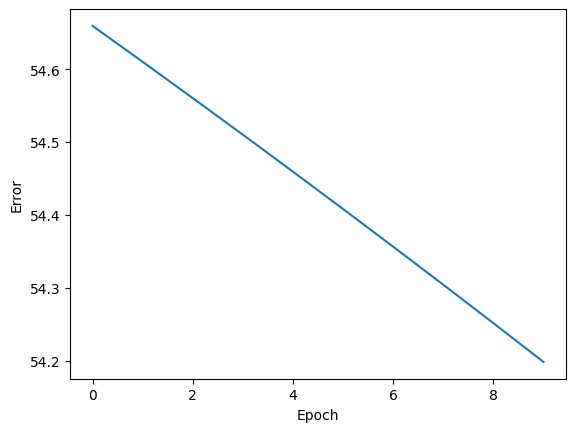

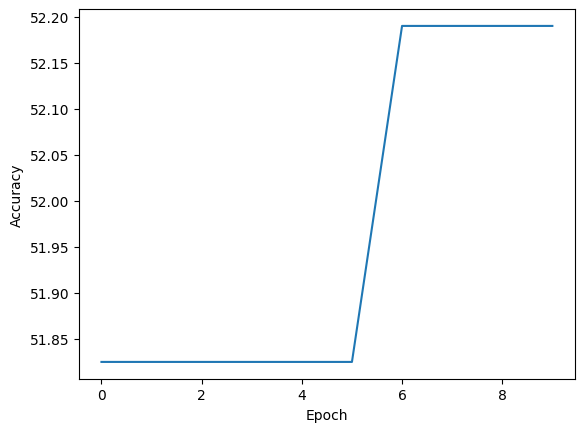

In [ ]:
#Task 12
#Report the training, validation and testing accuracies. Use tables, graphs, and charts as possible.
#Calling Main function and taking the returns of it and printing test error vector, error and accuracy and drawing graph for error and accuracy changes during training epochs
error_change, accuracy_change, error_vector , error, accuracy= Farafra(df, input_layer_size, hidden_layer_size, output_layer_size, t, v, s, batch_size, epochs,alpha)
#Printing the error vector, error and accuracy resulting from the testing set
print("Testing Error Vector:", error_vector ,"\n", "Testing Error:", error, "\n", "Testing Accuracy:",accuracy)

# Plotting the change in error after each epoch
plt.plot(error_change)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

# Plotting the accuracy after the validation after each epoch
plt.plot(accuracy_change)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

#Second Dataset

In [ ]:
#Task 2 Extra
#Bonus for using an additional dataset different than the one mentioned here
#Blood Transfusion Service Center Dataset

second_dataset_link = 'https://drive.google.com/uc?id=1bysMU5mOJOl-S9YAjLZNid53ZZjbzM_l'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(second_dataset_link, sep=',',header=None)  # Adjust the separator based on your file format
df2.columns = ['x1','x2','x3','x4','y']

#  Change the value in the output column to 0 and 1 instead of 1 and 2
df2.loc[df2['y'] == 2, 'y'] = 0

df2

,x1,x2,x3,x4,y
0,2,50,12500,98,0
1,0,13,3250,28,0
2,1,16,4000,35,0
3,2,20,5000,45,0
4,1,24,6000,77,1
...,...,...,...,...,...
743,23,2,500,38,1
744,21,2,500,52,1
745,23,3,750,62,1
746,39,1,250,39,1


Testing Error Vector: [ True  True False False  True  True False False  True False False  True
  True  True False False False False  True False False  True False False
 False  True  True  True  True False  True  True False False False False
 False  True  True False  True  True  True False  True  True  True False
  True  True False False False  True  True  True False  True False  True
 False  True False False False  True  True  True  True False False  True
  True False False  True False False  True  True  True  True False  True
 False  True False  True False  True False False  True  True False False
  True False False  True  True  True False  True  True  True  True False
 False  True False False False False False False  True  True False False
  True False  True  True  True  True False False  True False False False
 False False False False False  True] 
 Testing Error: 22.774795209304216 
 Testing Accuracy: 48.55072463768116


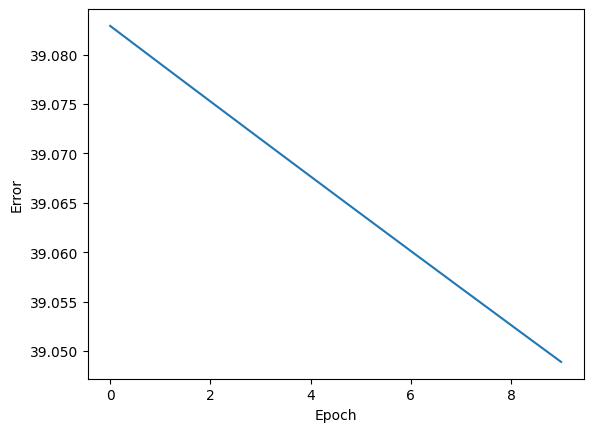

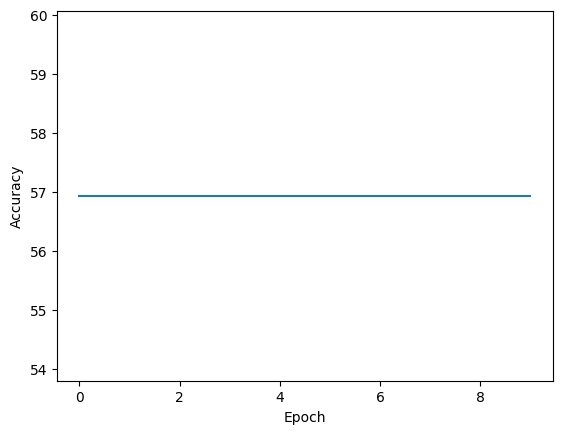

In [ ]:
#Task 12 Dataset2
#Report the training, validation and testing accuracies. Use tables, graphs, and charts as possible.
#Calling Main function and taking the returns of it and printing test error vector, error and accuracy and drawing graph for error and accuracy changes during training epochs
error_change, accuracy_change, error_vector , error, accuracy= Farafra(df2, input_layer_size, hidden_layer_size, output_layer_size, t, v, s, batch_size, epochs,alpha)
#Printing the error vector, error and accuracy resulting from the testing set
print("Testing Error Vector:", error_vector ,"\n", "Testing Error:", error, "\n", "Testing Accuracy:",accuracy)

# Plotting the change in error after each epoch
plt.plot(error_change)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

# Plotting the accuracy after the validation after each epoch
plt.plot(accuracy_change)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()